## Real Estate - Price Predictor

In [2]:
import pandas as pd

In [1]:
import numpy as np

In [3]:
housing = pd.read_csv("data.csv")

In [8]:
housing.head()

,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedroooms         545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
yes_no_cols = housing.columns[housing.isin(['yes', 'no']).all(axis=0)]
housing[yes_no_cols] = housing[yes_no_cols].replace({'yes': 1, 'no': 0})
print(housing)


     area  bedroooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420          4          2        3         1          0         0   
1    8960          4          4        4         1          0         0   
2    9960          3          2        2         1          0         1   
3    7500          4          2        2         1          0         1   
4    7420          4          1        2         1          1         1   
..    ...        ...        ...      ...       ...        ...       ...   
540  3000          2          1        1         1          0         1   
541  2400          3          1        1         0          0         0   
542  3620          2          1        1         1          0         0   
543  2910          3          1        1         0          0         0   
544  3850          3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea furnishingstatus  \
0                  0  

In [7]:
housing.head()

,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,furnished,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,11410000


In [ ]:
housing = pd.get_dummies(housing, columns=['furnishingstatus'], prefix='furnish')
housing = housing.astype(int)



In [9]:
housing.head()


,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,13300000,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,12250000,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,12250000,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,12215000,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,11410000,1,0,0


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   area                    545 non-null    int64
 1   bedroooms               545 non-null    int64
 2   bathrooms               545 non-null    int64
 3   stories                 545 non-null    int64
 4   mainroad                545 non-null    int64
 5   guestroom               545 non-null    int64
 6   basement                545 non-null    int64
 7   hotwaterheating         545 non-null    int64
 8   airconditioning         545 non-null    int64
 9   parking                 545 non-null    int64
 10  prefarea                545 non-null    int64
 11  price                   545 non-null    int64
 12  furnish_furnished       545 non-null    int64
 13  furnish_semi-furnished  545 non-null    int64
 14  furnish_unfurnished     545 non-null    int64
dtypes: int64(15)
memory usa

In [11]:
housing.describe()

,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,4.766729e+06,0.256881,0.416514,0.326606
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,1.870440e+06,0.437314,0.493434,0.469402
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000e+06,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.430000e+06,0.000000,0.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.340000e+06,0.000000,0.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.740000e+06,1.000000,1.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.330000e+07,1.000000,1.000000,1.000000


In [12]:
%matplotlib inline

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedroooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'furnish_furnished'}>,
        <Axes: title={'center': 'furnish_semi-furnished'}>,
        <Axes: title={'center': 'furnish_unfurnished'}>, <Axes: >]],
      dtype=object)

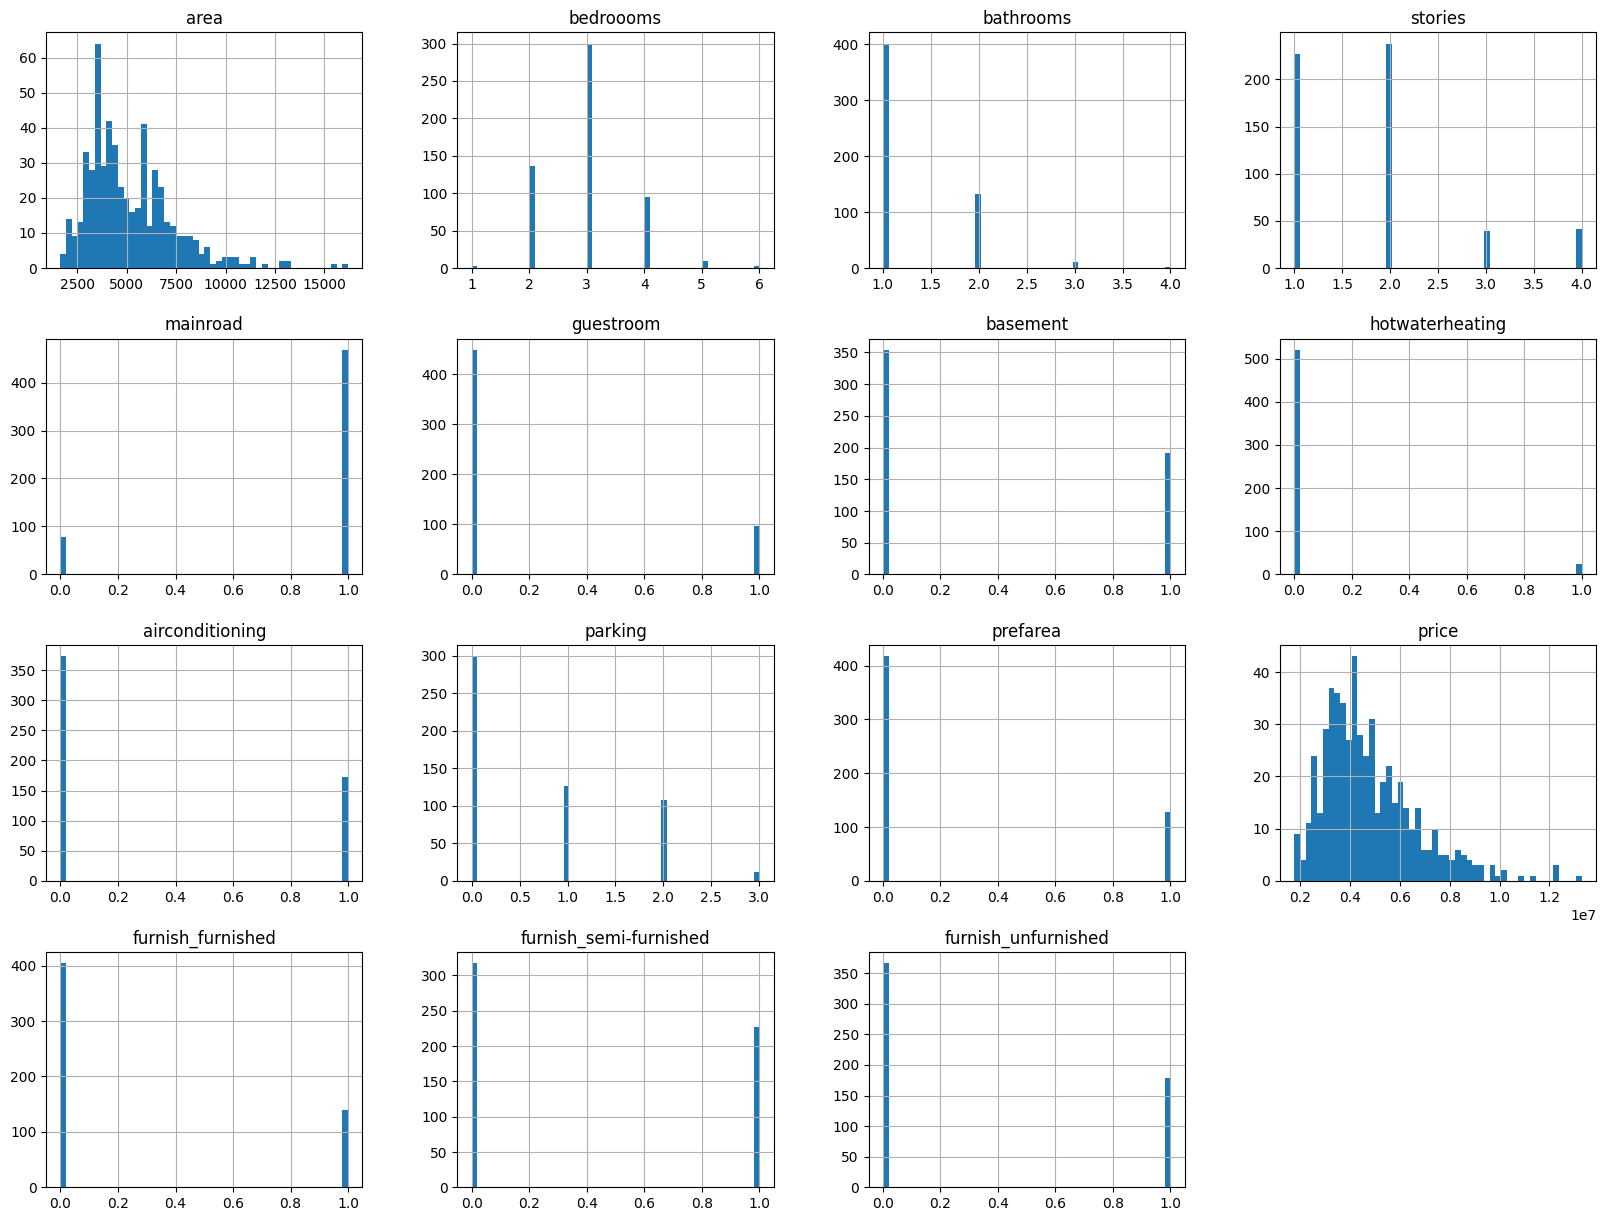

In [13]:
# For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Looking for Correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['price'].sort_values(ascending = False)

price                     1.000000
area                      0.535997
bathrooms                 0.517545
airconditioning           0.452954
stories                   0.420712
parking                   0.384394
bedroooms                 0.366494
prefarea                  0.329777
mainroad                  0.296898
guestroom                 0.255517
furnish_furnished         0.229350
basement                  0.187057
hotwaterheating           0.093073
furnish_semi-furnished    0.063656
furnish_unfurnished      -0.280587
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='airconditioning', ylabel='price'>,
        <Axes: xlabel='stories', ylabel='price'>,
        <Axes: xlabel='parking', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bathrooms', ylabel='area'>,
        <Axes: xlabel='airconditioning', ylabel='area'>,
        <Axes: xlabel='stories', ylabel='area'>,
        <Axes: xlabel='parking', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='area', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>,
        <Axes: xlabel='airconditioning', ylabel='bathrooms'>,
        <Axes: xlabel='stories', ylabel='bathrooms'>,
        <Axes: xlabel='parking', ylabel='bathrooms'>],
       [<Axes: xlabel='price', ylabel='airconditioning'>,
      

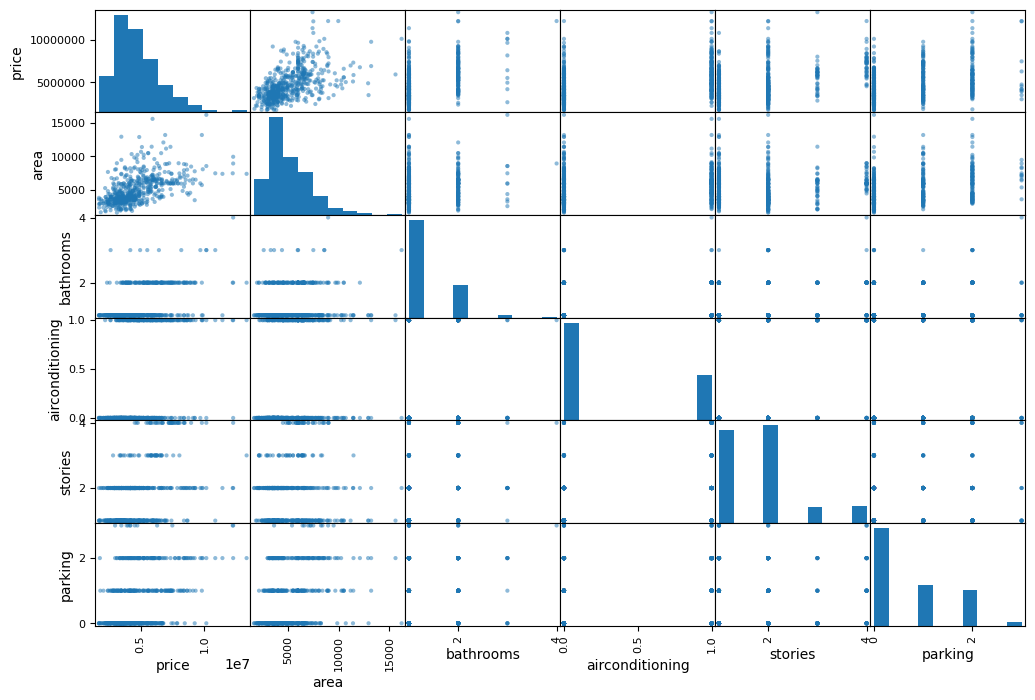

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['price', 'area', 'bathrooms', 'airconditioning', 'stories', 'parking']
scatter_matrix(housing[attributes], figsize=(12, 8))


<Axes: xlabel='price', ylabel='area'>

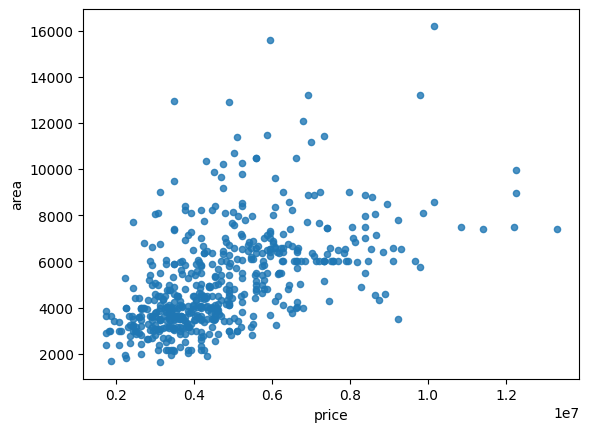

In [16]:
housing.plot(kind="scatter", x="price", y="area", alpha=0.8)

## Attribute combinations

housing['baths_per_bedroom'] = housing['bathrooms'] / housing['bedroooms']
housing['structure_score'] = housing['stories'] + housing['parking']
housing['luxury_score'] = (
    housing['airconditioning'] +
    housing['bathrooms'] +
    housing['stories'] +
    housing['prefarea']
)
housing['furnish_score'] = (
    2 * housing['furnish_furnished'] +
    housing['furnish_semi-furnished']
)
housing['amenity_count'] = (
    housing['airconditioning'] +
    housing['basement'] +
    housing['hotwaterheating'] +
    housing['guestroom']
)
housing['bedroom_density'] = housing['bedroooms'] / housing['area']

In [17]:
housing.head()

,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,13300000,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,12250000,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,12250000,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,12215000,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,11410000,1,0,0


In [18]:
corr_matrix = housing.corr()
corr_matrix['price'].sort_values(ascending = False)

price                     1.000000
area                      0.535997
bathrooms                 0.517545
airconditioning           0.452954
stories                   0.420712
parking                   0.384394
bedroooms                 0.366494
prefarea                  0.329777
mainroad                  0.296898
guestroom                 0.255517
furnish_furnished         0.229350
basement                  0.187057
hotwaterheating           0.093073
furnish_semi-furnished    0.063656
furnish_unfurnished      -0.280587
Name: price, dtype: float64

housing.plot(kind="scatter", x="price", y="luxury_score", alpha=0.8)

In [19]:
housing.head()

,area,bedroooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,13300000,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,12250000,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,12250000,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,12215000,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,11410000,1,0,0


In [20]:
print(housing.shape)     # Should show (rows, 20)
print(housing.columns) 

(545, 15)
Index(['area', 'bedroooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'price', 'furnish_furnished', 'furnish_semi-furnished',
       'furnish_unfurnished'],
      dtype='object')


## Train_Test_Split

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set:{len(train_set)}\n Rows in test set: {len(test_set)}")
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit (n_splits=1, test_size=0.2, random_state =42)
for train_index, test_index in split.split(housing, housing["prefarea"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing = strat_train_set.copy()

Rows in train set:436
 Rows in test set: 109


In [22]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set['price'].copy()

## Missing Attributes

To take care of missing attributes, you have three options:
1) Get rid of the missing data points.
2) Get rid of the whole attribute.
3) Set the value to some value(0, mean, median)
   ### ! Since, this dataset have no null attributes, we will skip this one !

 ## Scikit-learn Design 

Primarily, three types of objects
1) Estimators - Itestimates some parameters based on a dataset. Eg. imputer
It has a fit method and transform method. Fit method - Fits the dataset and calculate internal parameters
2) Transform method - Take the input and returns the output based on the learning from fir(). It also has a convenience function called fit_transform() which fits and then transforms.
3) Predictors - LinearRegression model is a example of predictors. fit() and predict () are two common functions. It also gives the sscore function which will evaluate the prediction.
    
    

## Feature Scaling

Primarily, two types of feature scaling methods:
1) Min-max scaling (Normalization)
    (value-min)/(max-min)
    Sklearn provides a class ---> MinMaxScaler

2) Standardization
    (value - mean)/std
    Sklearn provides a class --> StandardScaler

## Creating a Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [24]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [25]:
housing_num_tr.shape

(436, 14)

## Selecting a desired model 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
some_data = housing.iloc[:5]

In [31]:
some_labels = housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
model.predict(prepared_data)

array([9133600. , 3021287.5, 5853260. , 4242910. , 8501780. ])

In [34]:
list(some_labels)

[10150000, 3570000, 5425000, 4270000, 9240000]

## Evaluating the model

In [35]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [36]:
rmse

np.float64(439645.12417782116)

## Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [38]:
rmse_scores

array([1325689.32681471, 1352419.07399972, 1271017.13097909,
       1068510.61793037,  987794.34768724, 1317799.29481966,
       1116381.02750253, 1176551.045056  ,  899430.62348664,
       1034860.34477122])

In [39]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Std", scores.std())

In [40]:
print_scores(rmse_scores)

Scores: [1325689.32681471 1352419.07399972 1271017.13097909 1068510.61793037
  987794.34768724 1317799.29481966 1116381.02750253 1176551.045056
  899430.62348664 1034860.34477122]
Mean 1155045.283304718
Std 150071.9695885263


## Saving the model

In [41]:
from joblib import dump, load
dump(model, 'Firm.joblib')

['Firm.joblib']

## Testing the model

In [47]:
x_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

[3959410.         4304580.         3374350.         4847570.
 7310310.         5798100.         3608269.         4380740.
 6280190.         6376510.         5796140.         6681185.
 5934810.         5590830.         3752058.33333333 4385115.
 7482230.         5822740.         4291490.         7164109.4
 4688565.         7407079.4        5116650.         3694180.
 3465206.5        7273309.4        5917940.         9622130.
 3904530.         3563350.         5702620.         4590985.
 3474730.         3527762.         4406640.         3199191.33333333
 4510030.         3411450.         2977310.         2677336.66666667
 4493300.         6940500.         3681755.         4015060.
 2971214.16666667 3762255.         3646370.         3319750.
 7372820.         7479588.2        4754470.         8268664.6
 7846720.         3019240.         3472430.5        3458560.
 3225495.         3328794.         5493180.         4519550.
 3619770.         4551960.         6941579.4        4785725.
 30340

In [46]:
final_rmse

np.float64(1163226.951357254)

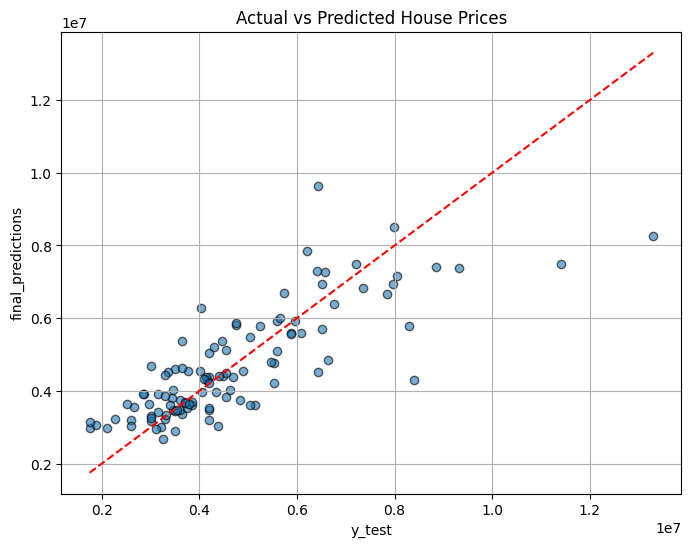

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.6, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # ideal line
plt.xlabel("y_test")
plt.ylabel("final_predictions")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [52]:
prepared_data[0]

array([ 5.0303415 ,  2.74175583,  3.46742497,  0.25666614,  0.38780895,
       -0.48128829, -0.79558708, -0.2134562 , -0.68050514, -0.82983596,
       -0.55262032, -0.61269431, -0.79943589,  1.40213637])